# Ordinary differential equations

Let’s consider a simple 1st order equation: 

$\frac{dy}{dx}=f(x,y)$

To solve this equation with a computer we need to **discretize** the differences: we
have to convert the differential equation into a “**finite differences**” equation. The simplest
solution is Euler’s method. More advanced (or more involved, maybe) include the 2nd and 4th order Runge-Kutta Methods.

## Euler’s method

Suppose that at a point $x_0$, the function $f$ has a value $y_0$. We
want to find the approximate value of $y$ in a point $x_1$ close to
$x_0$, $x_1=x_0+\Delta x$, with $\Delta x$ small. We assume that $f$,
the rate of change of $y$, is constant in this interval $\Delta x$.
Therefore we find: 

$$dx \approx \Delta x =x_1-x_0\\$$
$$dy \approx \Delta y =y_1-y_0$$
 
with $y_1=y(x_1)=y(x_0+\Delta x)$. Then we re-write the differential equation in terms of discrete differences as:

$$\frac{\Delta y}{\Delta x}=f(x,y)$$

or 

$$\Delta y = f(x,y)\Delta x$$

and approximate the value of $y_1$ as
$y_1=y_0+f(x_0,y_0)(x_1-x_0)$.

We can generalize this formula to find
the value of $y$ at $x_2=x_1+\Delta x$ as

$y_{2}=y_1+f(x_1,y_1)\Delta x,$ 

or in the general case:

$y_{n+1}=y_n+f(x_n,y_n)\Delta x$

This is a good approximation as long as $\Delta x$ is “small”. What is
small? Depends on the problem, but it is basically defined by the “rate
of change”, or “smoothness” of $f$. $f(x)$ has to behave smoothly and
without rapid variations in the interval $\Delta x$.

Notice that Euler’s method is equivalent to a 1st order Taylor expansion
about the point $x_0$. 

### Newton’s law of cooling 

If the temperature difference between an object and its surroundings is
small, the rate of change of the temperature of the object is
proportional to the temperature difference: $\frac{dT}{dt}=-r(T-T_s),$
where $T$ is the temperature of the body, $T_s$ is the temperature of
the environment, and $r$ is a “cooling constant” that depends on the
heat transfer mechanism, the contact area with the environment and the
thermal properties of the body. The minus sign appears because if
$T>T_s$, the temperature must decrease.

Let's write a program to calculate the temperature of a body at a time $t$,
given the cooling constant $r$ and the temperature of the body at time
$t=0$. Plot the results for $r=0.1\frac{1}{min}$; $T_s=83^{\circ} C$, $T_0=10^{\circ}$
using different intervals $\Delta t$ and compare with exact (analytical)
results.

In [56]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 60. # maximum time
nsteps = int(tmax/dt)  # number of steps

In [57]:
T = T0
my_temp, my_time = [], [] # store temps and times
for i in range(1,nsteps+1):
    new_T = T - r*(T-Ts)*dt
    T = new_T
    my_time.append(i*dt)
    my_temp.append(T)
    if i%100 == 0: print ('{:20.18f}  {:20.18f}  {:20.18f}'.format(i,i*dt, T))
    # we can also do T = T - r*(T-Ts)*dt
    

100.000000000000000000  5.000000000000000000  38.778758136176847415
200.000000000000000000  10.000000000000000000  56.212079013989772136
300.000000000000000000  15.000000000000000000  66.772669411625400926
400.000000000000000000  20.000000000000000000  73.169962866400993562
500.000000000000000000  25.000000000000000000  77.045254114859673678
600.000000000000000000  30.000000000000000000  79.392790985967252482
700.000000000000000000  35.000000000000000000  80.814859421056084443
800.000000000000000000  40.000000000000000000  81.676306437699537355
900.000000000000000000  45.000000000000000000  82.198145572985325202
1000.000000000000000000  50.000000000000000000  82.514260293745351760
1100.000000000000000000  55.000000000000000000  82.705753246121219036
1200.000000000000000000  60.000000000000000000  82.821754015466851229


Let's try plotting the results. We first need to import the required libraries and methods

In [59]:
import numpy as np
from matplotlib import pyplot as plt

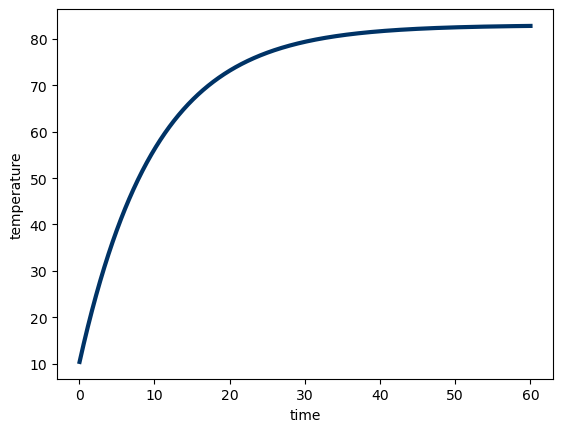

In [60]:
plt.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
plt.xlabel('time')
plt.ylabel('temperature');

Alternatively, and in order to re use code in future problems, we could have created a function `euler` which we could iterate over.

In [62]:
def euler(y, f, dx):
    """Computes y_new = y + f*dx
    
    Parameters
    ----------
    y  : float
        old value of y_n at x_n
    f  : float
        first derivative f(x,y) evaluated at (x_n,y_n)
    dx : float
        x step
    """
    
    return y + f*dx

In [63]:
T = T0
tpoints = [0] 
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt)
    tpoints.append(tpoints[i-1]+dt)
    my_temp[i] = T


Text(0, 0.5, 'temp')

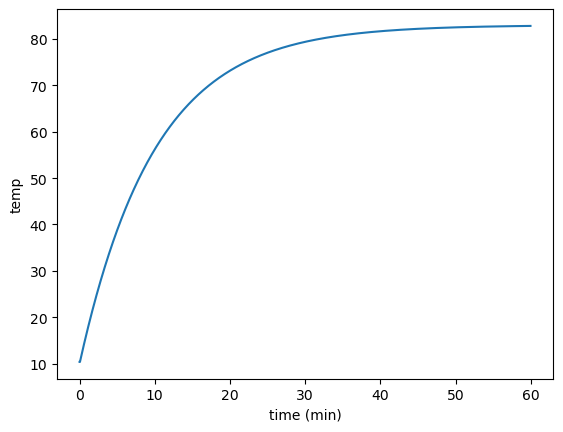

In [64]:
plt.plot(tpoints,my_temp)
plt.xlabel('time (min)')
plt.ylabel('temp')

Actually, for this particularly simple case, calling a function may introduce unecessary overhead, but it is a an example that we will find useful for future applications. For a simple function like this we could have used a "lambda" function (more about lambda functions <a href="https://www.geeksforgeeks.org/python-lambda-anonymous-functions-filter-map-reduce/#">here</a>).

In [66]:
euler = lambda y, f, dx: y + f*dx 

Now, let's study the effects of different time steps $dt$ on the convergence. We expect that as $dt$ gets small, the result gets better and better but it's slower and slower

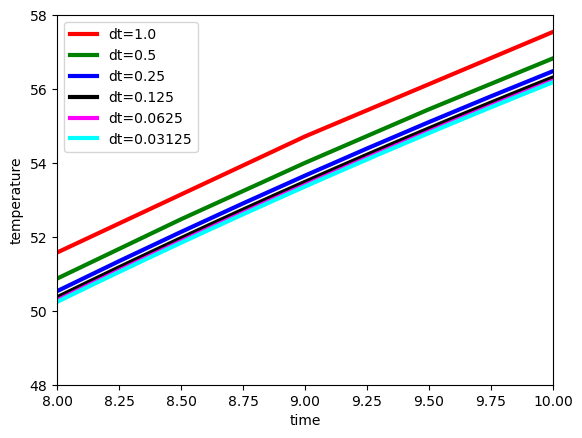

In [68]:
dt = 1.
my_color = ['red', 'green', 'blue', 'black', 'magenta', 'cyan']
for j in range(0,6):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(0,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
        
    plt.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3, label="dt="+str(dt))
    dt = dt/2.

plt.xlabel('time');
plt.ylabel('temperature');
plt.legend()
plt.xlim(8,10)
plt.ylim(48,58);

We see that the gap between the result gets smaller and smaller as $dt$ gets smaller and smaller. This problem is too simple to see the effect of $dt$ on computation time.

But on theoretical grounds, how does computation time scale?

### Convergence Challenge

To properly study convergence, one possibility it so look at the result at a given time, for different time steps. Modify the previous program to print the temperature at $t=10$ as a function of $\Delta t$. 

In [71]:
dt = 1.
dts, temp_at_t10s = [], []
for j in range(0,15):
    dts.append(dt)
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(0,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
        
    t10_idx = np.where(my_time==10.)[0][0]
    temp_at_t10s.append(my_temp[t10_idx])

    dt = dt / 2

Text(0, 0.5, 'temp')

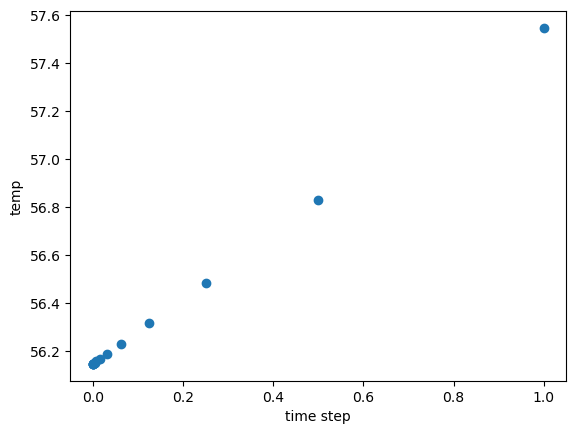

In [72]:
plt.scatter(dts, temp_at_t10s)
plt.xlabel('time step')
plt.ylabel('temp')

This shows explicit convergence to a fixed value. We'd also like to see how the temperature differs

Text(0, 0.5, 'temp change')

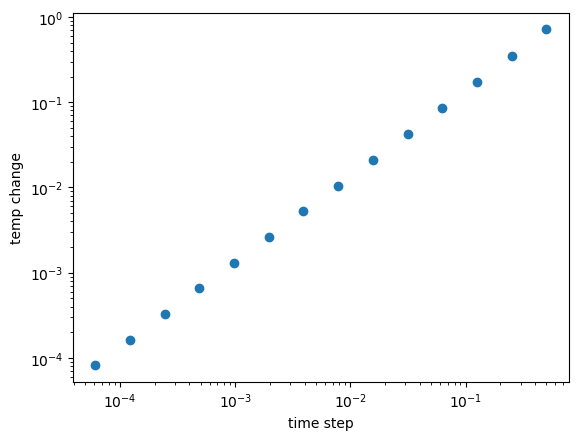

In [74]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(dts[1:], [abs(temp_at_t10s[i] - temp_at_t10s[i-1]) for i in range(1, len(dts))])
plt.xlabel('time step')
plt.ylabel('temp change')

Such a beautiful line on a log-log scale tells us that the temperature difference for different dts scales as a power law. Let's find out what the exponent is by fitting a line to the data.

In [76]:
# fit line to data
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, np.log(dts[1:]), np.log([abs(temp_at_t10s[i] - temp_at_t10s[i-1]) for i in range(1, len(dts))]))

In [77]:
popt

array([1.004452  , 0.32696688])

The slope being $1$ tells us the power law.

## 2nd-Order Runge-Kutta Method (RK2)

The Euler method provides a simple but often inaccurate approach to solving differential equations due to its reliance on a linear approximation. The 2nd-order Runge-Kutta method (RK2) improves upon this by incorporating an intermediate step, leading to greater accuracy.

Suppose we have the differential equation: $\frac{dy}{dx} = f(x, y)$. Given an initial point $(x_0,y_0)$, we approximate the value of $y$ at $x_1 = x_0+\Delta x$ by taking the average of two slopes:

1. Compute an initial estimate of the slope at $(x_0,y_0)$: $$k_1 = f(x_0, y_0)$$
2. Use  to estimate $k_1$ at an intermediate point: $y^* = y_0 + k_1 \frac{\Delta x}{2}$. Then compute the slope at $(x_0 + \Delta x/2,y^*)$: $$k_2 = f(x_0 + \frac{\Delta x}{2}, y_0 + k_1 \frac{\Delta x}{2})$$
3. Use $k_2$ to compute the next approximation: $y_1 = y_0 + k_2 \Delta x$. Or in terms of any step: $$y_{n+1} = y_n + k_2 \Delta x$$

This method is more accurate than Euler's method because it uses an intermediate slope estimate rather than relying solely on the slope at the starting point.

Let's look at the same cooling law as before, but solve it using the rk2 method.

In [81]:
def rk2(y, f, dx):
    """
    2nd-order Runge-Kutta method for numerical integration.
    
    Parameters
    ----------
    y  : float
        Old value of y_n at x_n
    f  : function
        Function f(x, y) representing dy/dx
    dx : float
        Step size
    
    Returns
    -------
    y_new : float
        New estimated value of y at x_n+dx
    """
    k1 = f(y)
    k2 = f(y + k1 * dx / 2)
    return y + k2 * dx

In [82]:
def cooling(T):
    return -r * (T - Ts)
# Initial Conditions
T0 = 10.  # Initial temperature
Ts = 83.   # Surrounding temperature
r = 0.1   # Cooling rate
nsteps = 600
dt = 0.1

# Run simulation using RK2
T = T0
rk2_temps = [T]
tpoints = [0]
for i in range(1, nsteps):
    T = rk2(T, cooling, dt)
    rk2_temps.append(T)
    tpoints.append(tpoints[i-1] + dt)

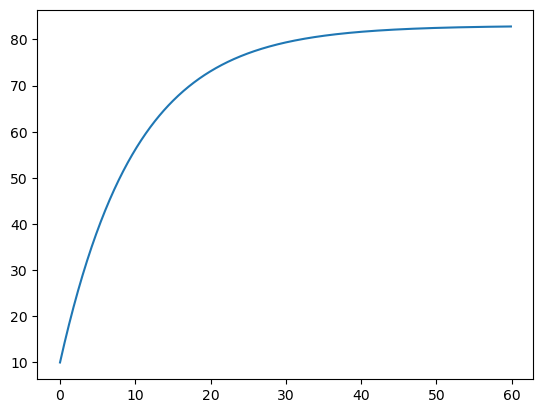

In [83]:
plt.plot(tpoints, rk2_temps)

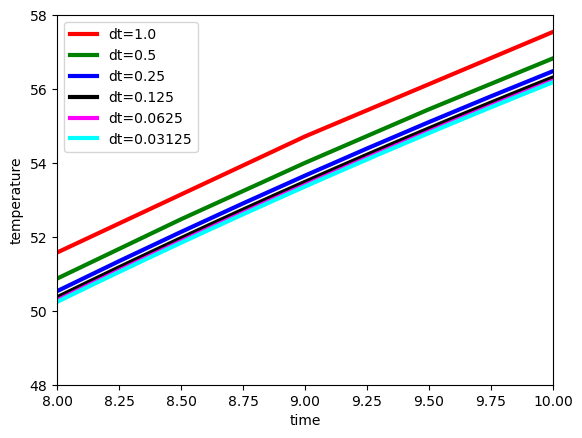

In [84]:
dt = 1.
my_color = ['red', 'green', 'blue', 'black', 'magenta', 'cyan']
for j in range(0,6):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(0,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
        
    plt.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3, label="dt="+str(dt))
    dt = dt/2.

plt.xlabel('time');
plt.ylabel('temperature');
plt.legend()
plt.xlim(8,10)
plt.ylim(48,58);

# Convergence Investigation
Repeat the convergence study done for the Euler method above for the 2nd order Runge-Kutta method. Find the power of the step size in which the solution converges.

## 4th-Order Runge-Kutta Method (RK4)

The 4th-order Runge-Kutta method (RK4) is one of the most commonly used numerical methods for solving differential equations due to its balance between accuracy and computational efficiency. It refines the RK2 method by incorporating four estimates of the slope.

Given our differential equation: $\frac{dy}{dx} = f(x, y)$, we can compute the next value of $y_{n+1}$ using 4 intermediate slopes.

1. Compute the initial slope at $(x_n,y_n)$: $$k_1 = f(x_n, y_n)$$
2. Compute the slope as the midpoint using $k_1$: $$k_2 = f(x_n + \frac{\Delta x}{2}, y_n + k_1 \frac{\Delta x}{2})$$
3. Compute another midterpoint slope using $k_2$: $$k_3 = f(x_n + \frac{\Delta x}{2}, y_n + k_2 \frac{\Delta x}{2})$$
4. Compute the slope at the endpoint using $k_3$: $$k_4 = f(x_n + \Delta x, y_n + k_3 \Delta x)$$

Using these four slopes, we compute $y_{n+1}$ as a weighted average: $$y_{n+1} = y_n + \frac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4) \Delta x$$


This method is significantly more accurate than both Euler’s method and RK2, while still being computationally efficient. The weights ensure that the error is minimized up to fourth-order terms in a Taylor expansion.

We can now look at how the cooling law could be solved using the rk4 method.

In [88]:
def rk4(y, f, dx):
    """
    4th-order Runge-Kutta method for numerical integration.
    
    Parameters
    ----------
    y  : float
        Old value of y_n at x_n
    f  : function
        Function f(x, y) representing dy/dx
    dx : float
        Step size
    
    Returns
    -------
    y_new : float
        New estimated value of y at x_n+dx
    """
    k1 = f(y)
    k2 = f(y + k1 * dx / 2)
    k3 = f(y + k2 * dx / 2)
    k4 = f(y + k3 * dx)
    return y + (dx / 6) * (k1 + 2*k2 + 2*k3 + k4)

In [89]:
# Run simulation using RK4
T = T0
rk4_temps = [T]
tpoints = [0]
for i in range(1, nsteps):
    T = rk4(T, cooling, dt)
    rk4_temps.append(T)
    tpoints.append(tpoints[i-1] + dt)

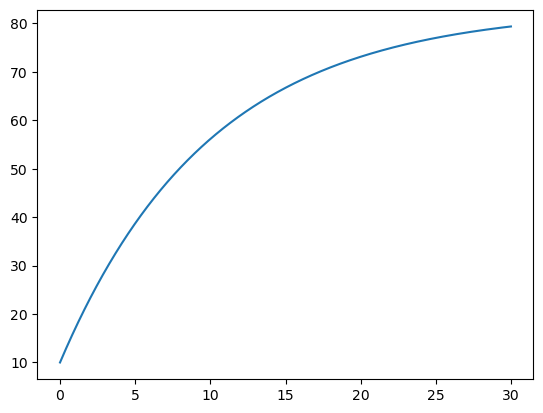

In [90]:
plt.plot(tpoints,rk4_temps)

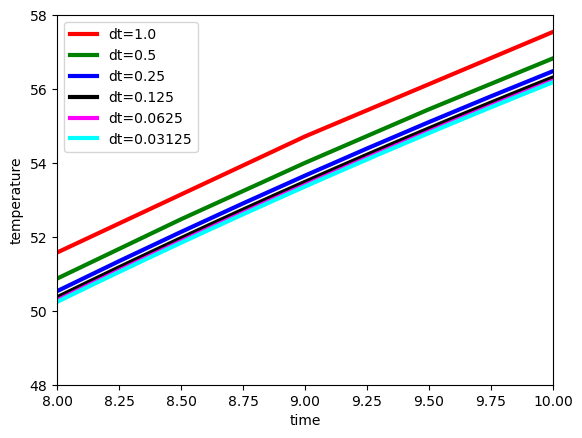

In [91]:
dt = 1.
my_color = ['red', 'green', 'blue', 'black', 'magenta', 'cyan']
for j in range(0,6):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(0,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
        
    plt.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3, label="dt="+str(dt))
    dt = dt/2.

plt.xlabel('time');
plt.ylabel('temperature');
plt.legend()
plt.xlim(8,10)
plt.ylim(48,58);

# Convergence Investigation
Repeat the convergence study done for the Euler method above for the 4th order Runge-Kutta method. Find the power of the step size in which the solution converges. The euler method went as $h^1$.

# Scipy Solve
The library scipy contains a useful function `solve_ivp`. This function numerically solves initial value problems (ivp) for ordinary differential equations. `solve_ivp` uses adaptive step size methods to solve first-order ODEs or systems of ODEs. You'll find some oddities in the 4th-order Runge-Kutta method, so watch out.

## Input Arguments:
The syntax of this function is 
```python
solve_ivp(fun, t_space, y0, method, t_eval)
```
- fun: Function defining $dy/dt = f(t,y)$.
- t_span: Tuple $(t0, tf)$ specifying the time range.
- y0: Initial condition(s).
- method: Numerical solver ('RK23','RK45', 'BDF', etc.).
- t_eval: Optional time points for solution evaluation.

In [95]:
from scipy.integrate import solve_ivp
# Example ODE: dy/dt = -2y + t
def f(t, y): # NOTE the function here must take 2 arg, independent, dependent IN ORDER
    return -2 * y + t  

sol = solve_ivp(f, (0, 5), [1], method='RK45', t_eval=[0, 1, 2, 3, 4, 5])

In [96]:
sol.t

array([0, 1, 2, 3, 4, 5])

In [97]:
sol.y

array([[1.        , 0.41929359, 0.77294401, 1.25300362, 1.75029402,
        2.25015332]])

In [98]:
sol.success

True

In [99]:
type(sol)

scipy.integrate._ivp.ivp.OdeResult

## Newton's cooling law
`solve_ivp` can solve Newton's cooling law in the same way as we do above, but we can leave more information about how to solve undetermined.

In [101]:
r = 0.1   # Cooling rate
Ts = 83.   # Surrounding temperature
cool = lambda t, T: -r * (T - Ts)
# Initial Conditions
T0 = 10.  # Initial temperature

sol = solve_ivp(cool, (0,60), [T0], dense_output=True)

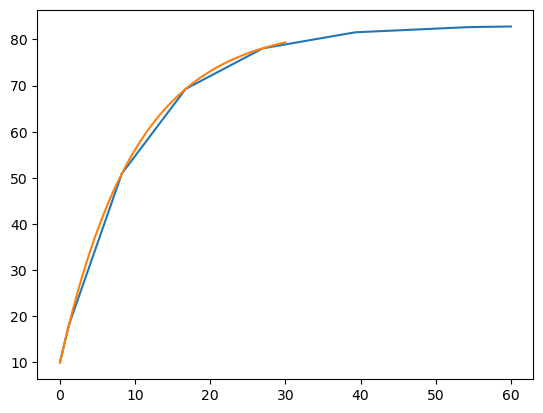

In [102]:
plt.plot(sol.t, sol.y[0], tpoints, rk4_temps)

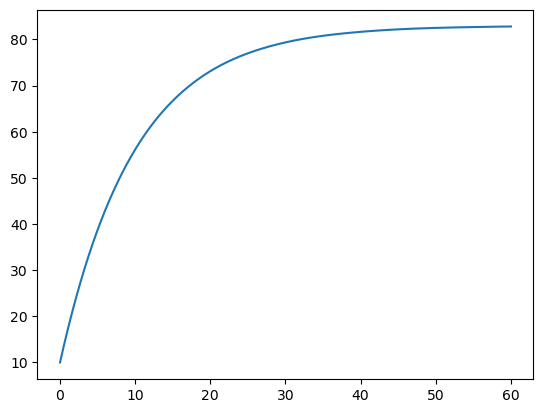

In [143]:
tsmooth = np.linspace(0,60,1000)
y_smooth = sol.sol(tsmooth)
plt.plot(tsmooth,y_smooth[0])

In [139]:
sol.y[0]

array([10.        , 10.77331501, 18.06992486, 50.94034642, 69.26025822,
       78.0752225 , 81.55380363, 82.66969365, 82.81261981])

In [141]:
sol.y

array([[10.        , 10.77331501, 18.06992486, 50.94034642, 69.26025822,
        78.0752225 , 81.55380363, 82.66969365, 82.81261981]])